<a href="https://colab.research.google.com/github/kjdatamc/Data110/blob/main/Project1/KHatton_project1_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors

In [2]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

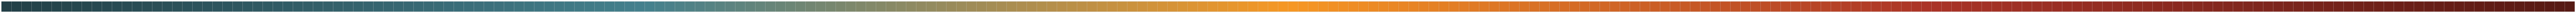

In [3]:
# Create colormap with presentation color palette
cmap = mcolors.LinearSegmentedColormap.from_list('byr_gradient', ['#234047','#45818E','#F79824','#AB3428','#561A14'])
byr_palette = [cmap(i) for i in range(cmap.N)]

# Display the colormap
sns.palplot(byr_palette)
plt.show()

In [4]:
# Import Dataset: NCHS - Potentially Excess Deaths from Five Leading Causes of Death
nchs=pd.read_csv("https://raw.githubusercontent.com/kjdatamc/Data110/refs/heads/main/Project1/NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv")

# Exploratory Data Analysis

## Describe the Data

In [5]:
# Determine Data Contents (columns, type)
nchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year                               205920 non-null  int64  
 1   Cause of Death                     205920 non-null  object 
 2   State                              205920 non-null  object 
 3   State FIPS Code                    205920 non-null  object 
 4   HHS Region                         205920 non-null  int64  
 5   Age Range                          205920 non-null  object 
 6   Benchmark                          205920 non-null  object 
 7   Locality                           205920 non-null  object 
 8   Observed Deaths                    195708 non-null  float64
 9   Population                         200640 non-null  float64
 10  Expected Deaths                    195708 non-null  float64
 11  Potentially Excess Deaths          1957

In [6]:
# View first few rows to get a sense of the data
nchs.head(9)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8
5,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Nonmetropolitan,200.0,768506.0,103.0,97.0,48.5
6,2005,Cancer,Alabama,AL,4,0-49,Floating,All,756.0,3148377.0,451.0,305.0,40.3
7,2005,Cancer,Alabama,AL,4,0-49,Floating,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
8,2005,Cancer,Alabama,AL,4,0-49,Floating,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5


In [7]:
# Get overview of distribution for numerical data
nchs.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
count,205920.000000,205920.000000,195708.000000,2.006400e+05,195708.000000,195708.000000,195708.000000
mean,2010.000000,5.230769,2974.568490,7.008421e+06,2112.863092,875.121043,35.728369
std,3.162285,2.798464,17164.665931,2.861818e+07,13291.617895,4410.206402,18.810895
min,2005.000000,0.000000,10.000000,5.553600e+04,2.000000,0.000000,0.000000
25%,2007.000000,3.000000,155.000000,6.828258e+05,92.000000,41.000000,20.900000
50%,2010.000000,5.000000,508.000000,1.610936e+06,298.000000,159.000000,35.800000
75%,2013.000000,8.000000,1586.000000,4.681585e+06,1019.000000,543.000000,50.100000
max,2015.000000,10.000000,493526.000000,3.151317e+08,465126.000000,175703.000000,85.300000


## Explore Null Values

In [8]:
# Create dataframe showing rows with any null values
nchs_null_rows = nchs[nchs.isnull().any(axis=1)]

nchs_null_rows.head(10)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
262,2005,Cancer,Delaware,DE,3,0-84,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
468,2005,Cancer,New Jersey,NJ,2,0-64,2005 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
508,2005,Cancer,Delaware,DE,3,0-49,2005 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
511,2005,Cancer,Delaware,DE,3,0-49,2010 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
514,2005,Cancer,Delaware,DE,3,0-49,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
517,2005,Cancer,Delaware,DE,3,0-54,2005 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
520,2005,Cancer,Delaware,DE,3,0-54,2010 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
523,2005,Cancer,Delaware,DE,3,0-54,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
526,2005,Cancer,Delaware,DE,3,0-59,2005 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
529,2005,Cancer,Delaware,DE,3,0-59,2010 Fixed,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN


In [9]:
# Repeat to take sample to get a better understanding of the null values;
# use `tail` to see different set

nchs_null_row_sample = (nchs_null_rows[nchs_null_rows['Year'] == 2015]
                     [nchs_null_rows['Benchmark'] == 'Floating']
                     [nchs_null_rows['Age Range'] == '0-54'])

nchs_null_row_sample.tail(10)

<ipython-input-9-a63afed1dfc7>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nchs_null_row_sample = (nchs_null_rows[nchs_null_rows['Year'] == 2015]
<ipython-input-9-a63afed1dfc7>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nchs_null_row_sample = (nchs_null_rows[nchs_null_rows['Year'] == 2015]


,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
201404,2015,Stroke,South Dakota,SD,8,0-54,Floating,Metropolitan,NaN,299410.0,NaN,NaN,NaN
201405,2015,Stroke,South Dakota,SD,8,0-54,Floating,Nonmetropolitan,NaN,298140.0,NaN,NaN,NaN
201690,2015,Stroke,Utah,UT,8,0-54,Floating,Nonmetropolitan,NaN,242457.0,NaN,NaN,NaN
201762,2015,Stroke,Vermont,VT,1,0-54,Floating,Metropolitan,NaN,157006.0,NaN,NaN,NaN
201763,2015,Stroke,Vermont,VT,1,0-54,Floating,Nonmetropolitan,NaN,262398.0,NaN,NaN,NaN
202120,2015,Stroke,Wyoming,WY,8,0-54,Floating,Metropolitan,NaN,130387.0,NaN,NaN,NaN
202698,2015,Unintentional Injury,Delaware,DE,3,0-54,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
202769,2015,Unintentional Injury,District of\nColumbia,DC,3,0-54,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
204353,2015,Unintentional Injury,New Jersey,NJ,2,0-54,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN
205003,2015,Unintentional Injury,Rhode Island,RI,1,0-54,Floating,Nonmetropolitan,NaN,NaN,NaN,NaN,NaN


## Explore Correlation

In [10]:
# Create data frame for quantitative data
nchs_quant = nchs.select_dtypes(include=['float64'])

# View data frame
print(nchs_quant.corr())

                                   Observed Deaths  Population  \
Observed Deaths                           1.000000    0.716449   
Population                                0.716449    1.000000   
Expected Deaths                           0.991205    0.671096   
Potentially Excess Deaths                 0.923613    0.779179   
Percent Potentially Excess Deaths        -0.058107   -0.029941   

                                   Expected Deaths  Potentially Excess Deaths  \
Observed Deaths                           0.991205                   0.923613   
Population                                0.671096                   0.779179   
Expected Deaths                           1.000000                   0.864940   
Potentially Excess Deaths                 0.864940                   1.000000   
Percent Potentially Excess Deaths        -0.077502                   0.003918   

                                   Percent Potentially Excess Deaths  
Observed Deaths                              

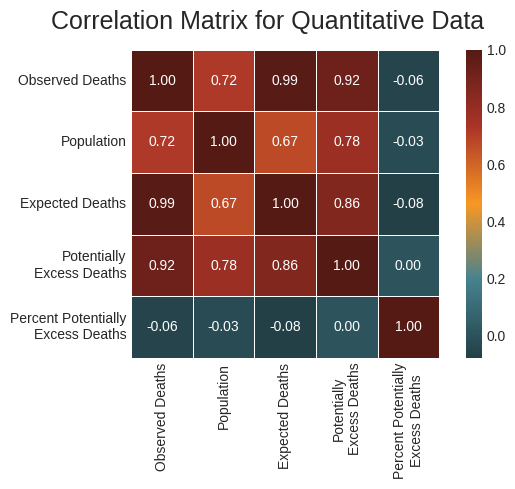

In [11]:
# Create correlation matrix for dataset

plt.figure(figsize=(7, 4))

plt.suptitle('Correlation Matrix for Quantitative Data', fontsize=18)

plt.subplot(1, 1, 1)
sns.heatmap(nchs_quant.corr(), square=True, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.xticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])
plt.yticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])

plt.show()

# Visualizing the Impact of Population on Other Quantitative Variables

## Create the Data Frame

In [12]:
# Create Population Focus data frame
pop_focus = (nchs[nchs['Year'] == 2015]
          [nchs['Benchmark'] == 'Floating']
          [nchs['Locality'] == 'All']
          [nchs['State'] != 'United States']
          [nchs['Age Range'] == '0-84']
          [nchs['Cause of Death'] == 'Stroke'])

<ipython-input-12-08575164a4dc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_focus = (nchs[nchs['Year'] == 2015]
<ipython-input-12-08575164a4dc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_focus = (nchs[nchs['Year'] == 2015]
<ipython-input-12-08575164a4dc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_focus = (nchs[nchs['Year'] == 2015]
<ipython-input-12-08575164a4dc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_focus = (nchs[nchs['Year'] == 2015]
<ipython-input-12-08575164a4dc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_focus = (nchs[nchs['Year'] == 2015]


In [13]:
# Check that filter worked
pop_focus.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
193003,2015,Stroke,South Dakota,SD,8,0-84,Floating,All,168.0,837101.0,143.0,29.0,17.3
198537,2015,Stroke,Alabama,AL,4,0-84,Floating,All,1944.0,4773540.0,833.0,1111.0,57.2
198609,2015,Stroke,Alaska,AK,10,0-84,Floating,All,123.0,732295.0,83.0,40.0,32.5
198677,2015,Stroke,Arizona,AZ,9,0-84,Floating,All,1465.0,6697276.0,1194.0,271.0,18.5
198747,2015,Stroke,Arkansas,AR,6,0-84,Floating,All,1066.0,2922224.0,515.0,551.0,51.7


In [14]:
# Check for null values
pop_focus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 193003 to 202173
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               51 non-null     int64  
 1   Cause of Death                     51 non-null     object 
 2   State                              51 non-null     object 
 3   State FIPS Code                    51 non-null     object 
 4   HHS Region                         51 non-null     int64  
 5   Age Range                          51 non-null     object 
 6   Benchmark                          51 non-null     object 
 7   Locality                           51 non-null     object 
 8   Observed Deaths                    51 non-null     float64
 9   Population                         51 non-null     float64
 10  Expected Deaths                    51 non-null     float64
 11  Potentially Excess Deaths          51 non-null     float

In [15]:
# Get overview of distribution for numerical data
pop_focus.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
count,51.0,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,2015.0,5.333333,1548.313725,6.179052e+06,1010.000000,539.666667,31.637255
std,0.0,2.754390,1655.604814,7.066665e+06,1105.659369,625.148420,13.948218
min,2015.0,1.000000,121.000000,5.758430e+05,83.000000,9.000000,3.600000
25%,2015.0,3.000000,393.500000,1.715930e+06,282.500000,78.000000,20.850000
50%,2015.0,5.000000,1149.000000,4.347731e+06,719.000000,283.000000,32.100000
75%,2015.0,8.000000,1911.000000,6.868322e+06,1151.500000,771.500000,42.350000
max,2015.0,10.000000,8081.000000,3.843704e+07,5664.000000,2943.000000,59.500000


In [16]:
# Create data frame for Population Focus quantitative data
pop_quant = pop_focus.select_dtypes(include=['float64'])

# View data frame
print(pop_quant.corr())

                                   Observed Deaths  Population  \
Observed Deaths                           1.000000    0.972200   
Population                                0.972200    1.000000   
Expected Deaths                           0.975538    0.984220   
Potentially Excess Deaths                 0.922937    0.834742   
Percent Potentially Excess Deaths         0.219972    0.065133   

                                   Expected Deaths  Potentially Excess Deaths  \
Observed Deaths                           0.975538                   0.922937   
Population                                0.984220                   0.834742   
Expected Deaths                           1.000000                   0.815745   
Potentially Excess Deaths                 0.815745                   1.000000   
Percent Potentially Excess Deaths         0.049692                   0.491491   

                                   Percent Potentially Excess Deaths  
Observed Deaths                              

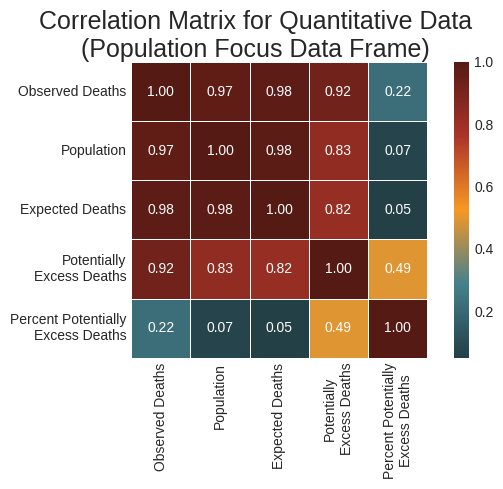

In [17]:
# Create correlation matrix for Population Focus data frame

plt.figure(figsize=(7, 4))

plt.subplots_adjust(top=0.85)
plt.suptitle('Correlation Matrix for Quantitative Data\n(Population Focus Data Frame)', fontsize=18)

plt.subplot(1, 1, 1)
sns.heatmap(pop_quant.corr(), square=True, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.xticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])
plt.yticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])

plt.show()

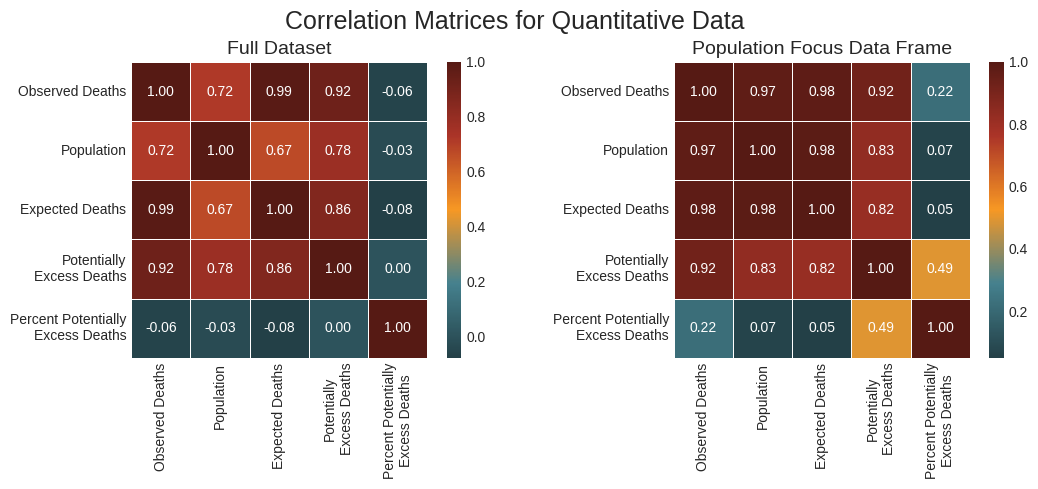

In [18]:
# Compare correlation matrices for overall dataset and Population Focus data frame

plt.figure(figsize=(12, 4))

plt.subplots_adjust(wspace=0.4, top=0.85)
plt.suptitle('Correlation Matrices for Quantitative Data               ', fontsize=18)

plt.subplot(1, 2, 1)
plt.title('Full Dataset', fontsize=14)
sns.heatmap(nchs_quant.corr(), square=True, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.xticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])
plt.yticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])

plt.subplot(1, 2, 2)
plt.title('Population Focus Data Frame', fontsize=14)
sns.heatmap(pop_quant.corr(), square=True, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.xticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])
plt.yticks([0.5,1.5,2.5,3.5,4.5],
 ['Observed Deaths','Population','Expected Deaths','Potentially\nExcess Deaths','Percent Potentially\nExcess Deaths'])

plt.show()

## Potentially Excess Deaths by Region: Stroke in the U.S., 2015

In [19]:
# Calculate regional totals for Potentially Excess Deaths
regional_ped = pop_focus.groupby('HHS Region')['Potentially Excess Deaths'].sum()

In [20]:
# Calculate regional averages for Percent Potentially Excess Deaths
reg_pped = {'HHS Reg': pop_focus['HHS Region'],
            'Pop': pop_focus['Population'],
            'PPED': pop_focus['Percent Potentially Excess Deaths']}
df_pped = pd.DataFrame(reg_pped)

# Group by 'Category' and calculate the sum of 'Value'
df_regw_pped = df_pped.groupby(['HHS Reg'])[df_pped.columns].apply(lambda x: np.average(x['PPED'], weights=x['Pop'])).reset_index(name='rwPPED')

# Print the new DataFrame
df_regw_pped.head(11)

,HHS Reg,rwPPED
0,1,6.875760
1,2,12.303966
2,3,35.446642
3,4,43.265455
4,5,33.562503
5,6,45.191963
6,7,33.278384
7,8,23.273101
8,9,29.066215
9,10,26.126424


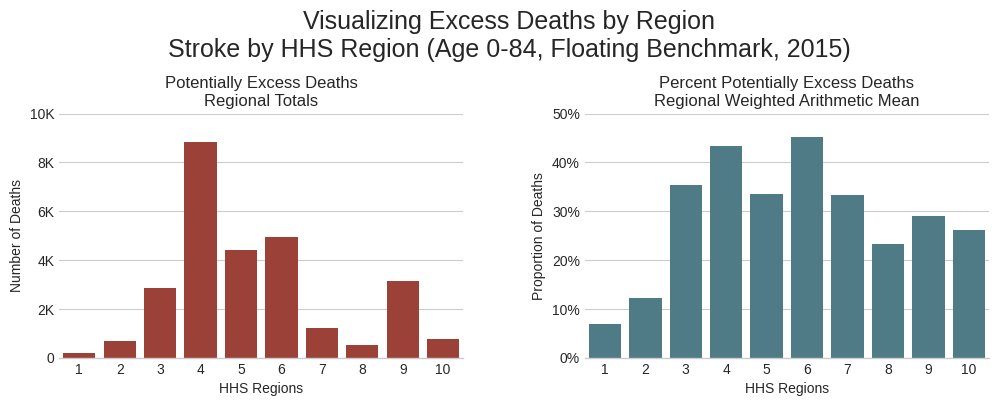

In [21]:
# Compare visualizations of potentially excess deaths by region:
#  1. Potentially Excess Deaths (regional totals of absolute values)
#  2. Percent Potentially Excess Deaths (regional weighted arithmetic mean)

plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.3, top=0.72)
plt.suptitle('Visualizing Excess Deaths by Region\nStroke by HHS Region (Age 0-84, Floating Benchmark, 2015)', fontsize=18)

plt.subplot(1, 2, 1)
plt.title('Potentially Excess Deaths\nRegional Totals')
sns.barplot(x=regional_ped.index, y=regional_ped.values, color='#AB3428', zorder=2)
plt.xlabel('HHS Regions')
plt.grid(axis='x', visible=False)
plt.ylabel('Number of Deaths')
plt.yticks([0,2000,4000,6000,8000,10000],['0','2K','4K','6K','8K','10K'])

sns.despine(top=True, right=True, left=True, bottom=False)

plt.subplot(1, 2, 2)
plt.title('Percent Potentially Excess Deaths\nRegional Weighted Arithmetic Mean')
sns.barplot(x=df_regw_pped['HHS Reg'], y=df_regw_pped['rwPPED'], color='#45818E', zorder=2)
plt.xlabel('HHS Regions')
plt.ylabel('Proportion of Deaths')
plt.yticks([0,10,20,30,40,50],['0%','10%','20%','30%','40%','50%'])
plt.grid(axis='x', visible=False)

sns.despine(top=True, right=True, left=True, bottom=False)

plt.show()

## Influence of State Population on Other Quantitative Values: Stroke in the U.S., 2015

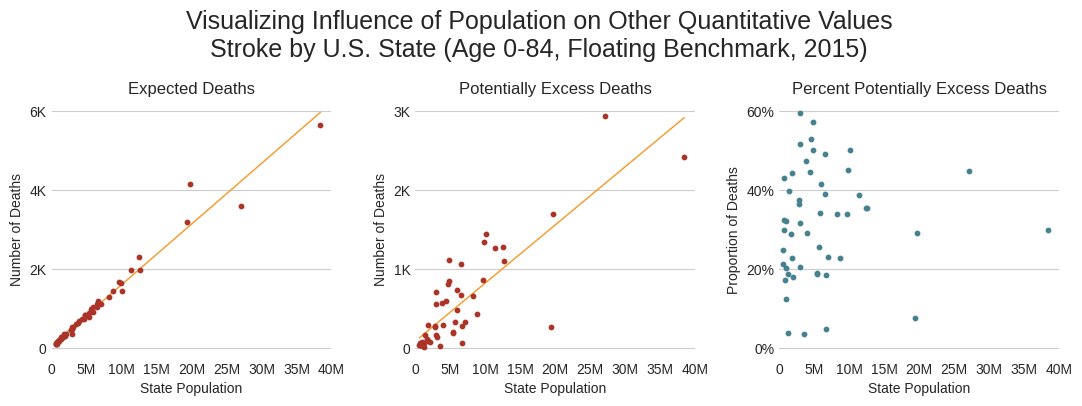

In [22]:
# Create x axis ticks replacement series
xaxis_pop=[0,'5M','10M','15M','20M','25M','30M','35M','40M']
xaxis_popindex=[0,5000000,10000000,15000000,20000000,25000000,30000000,35000000,40000000]

# Plot Population vs three other quantitative values to understand influence of Population on those values
#  1. Expected Deaths
#  2. Excess Deaths
#  3. Percent Potentially Excess Deaths

plt.figure(figsize=(13, 4))
plt.subplots_adjust(wspace=0.3, top=0.75)
plt.suptitle('Visualizing Influence of Population on Other Quantitative Values\nStroke by U.S. State (Age 0-84, Floating Benchmark, 2015)', fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Expected Deaths")
plt.scatter(pop_focus['Population'],pop_focus['Expected Deaths'],
            color='#AB3428',
            s=10,
            zorder=4)
sns.regplot(x='Population',y='Expected Deaths', data=pop_focus, scatter=False, color='#F79824', line_kws={'linewidth':1}, ci=None)
plt.xlabel('State Population')
plt.xlim(0,40000000)
plt.xticks(xaxis_popindex,xaxis_pop)
plt.ylabel('Number of Deaths')
plt.ylim(-250,6250)
plt.yticks([0,2000,4000,6000],['0','2K','4K','6K'])
plt.grid(axis='x', visible=False)


plt.subplot(1, 3, 2)
plt.title("Potentially Excess Deaths")
plt.scatter(pop_focus['Population'],pop_focus['Potentially Excess Deaths'],
            color='#AB3428',
            s=10,
            zorder=4)
sns.regplot(x='Population',y='Potentially Excess Deaths', data=pop_focus, scatter=False, color='#F79824', line_kws={'linewidth':1}, ci=None)
plt.xlabel('State Population')
plt.xlim(0,40000000)
plt.xticks(xaxis_popindex,xaxis_pop)
plt.ylabel('Number of Deaths')
plt.ylim(-125,3125)
plt.yticks([0,1000,2000,3000],['0','1K','2K','3K'])
plt.grid(axis='x', visible=False)


plt.subplot(1, 3, 3)
plt.title("Percent Potentially Excess Deaths")
plt.scatter(pop_focus['Population'],pop_focus['Percent Potentially Excess Deaths'],
            color='#45818E',
            s=10,
            zorder=2)
plt.xlabel('State Population')
plt.xlim(0,40000000)
plt.xticks(xaxis_popindex,xaxis_pop)
plt.ylabel('Proportion of Deaths')
plt.ylim(-2.5,62.5)
plt.yticks([0,20,40,60],['0%','20%','40%','60%'])
plt.grid(axis='x', visible=False)

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

# Identifying Hidden Trends Across Age Ranges

## Create Data Frame and Calculate Additional Columns

In [23]:
# Create Age Focus data frame
age_focus = (nchs[nchs['Locality'] == 'All']
               [nchs['State'] == 'United States']
               [nchs['Benchmark'] == 'Floating']
               [nchs['Year'] == 2015].dropna())

<ipython-input-23-867183ca392b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_focus = (nchs[nchs['Locality'] == 'All']
<ipython-input-23-867183ca392b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_focus = (nchs[nchs['Locality'] == 'All']
<ipython-input-23-867183ca392b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_focus = (nchs[nchs['Locality'] == 'All']


In [24]:
# Disaggregate age-cumulative data
# Step 1: Name Age Bins
def label_ab(row):
   if row['Age Range'] == '0-49':
      return ''
   if row['Age Range'] == '0-54':
      return '50-54'
   if row['Age Range'] == '0-59':
      return '55-59'
   if row['Age Range'] == '0-64':
      return '60-64'
   if row['Age Range'] == '0-69':
      return '65-69'
   if row['Age Range'] == '0-74':
      return '70-74'
   if row['Age Range'] == '0-79':
      return '75-79'
   if row['Age Range'] == '0-84':
      return '80-84'
   return


In [25]:
# Disaggregate age-cumulative data
# Step 2: Add calculated columns to dataframe
age_focus['DeltaObDe'] = age_focus.groupby('Cause of Death')['Observed Deaths'].diff()
age_focus['DeltaPop'] = age_focus.groupby('Cause of Death')['Population'].diff()
age_focus['Age Bin'] = age_focus.apply(label_ab, axis=1)
age_focus['DeltaDeathRate'] = age_focus['DeltaObDe'] / age_focus['DeltaPop'] * 100000

In [26]:
# Disaggregate age-cumulative data
# Step 3: test
age_focus.head(10)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,DeltaObDe,DeltaPop,Age Bin,DeltaDeathRate
190374,2015,Cancer,United States,0,0,0-49,Floating,All,31123.0,210445832.0,22956.0,8227.0,26.4,NaN,NaN,,NaN
190383,2015,Cancer,United States,0,0,0-54,Floating,All,60408.0,232780149.0,44639.0,15858.0,26.3,29285.0,22334317.0,50-54,131.121090
190392,2015,Cancer,United States,0,0,0-59,Floating,All,110554.0,254588091.0,81444.0,29196.0,26.4,50146.0,21807942.0,55-59,229.943752
190401,2015,Cancer,United States,0,0,0-64,Floating,All,176530.0,273657968.0,134342.0,42318.0,24.0,65976.0,19069877.0,60-64,345.969720
190410,2015,Cancer,United States,0,0,0-69,Floating,All,257213.0,289725436.0,206668.0,50875.0,19.8,80683.0,16067468.0,65-69,502.151303
190419,2015,Cancer,United States,0,0,0-74,Floating,All,340258.0,301208485.0,266815.0,73663.0,21.6,83045.0,11483049.0,70-74,723.196426
190428,2015,Cancer,United States,0,0,0-79,Floating,All,419683.0,309332318.0,343045.0,77004.0,18.3,79425.0,8123833.0,75-79,977.678886
190437,2015,Cancer,United States,0,0,0-84,Floating,All,493526.0,315131659.0,403511.0,90604.0,18.4,73843.0,5799341.0,80-84,1273.299846
194146,2015,Chronic Lower Respiratory Disease,United States,0,0,0-49,Floating,All,2538.0,210445832.0,1442.0,1101.0,43.4,NaN,NaN,,NaN
194155,2015,Chronic Lower Respiratory Disease,United States,0,0,0-54,Floating,All,5776.0,232780149.0,3307.0,2512.0,43.5,3238.0,22334317.0,50-54,14.497869


In [27]:
# Get overview of distribution for numerical data
age_focus.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,DeltaObDe,DeltaPop,DeltaDeathRate
count,40.0,40.0,40.000000,4.000000e+01,40.000000,40.000000,40.000000,35.000000,3.500000e+01,35.000000
mean,2015.0,0.0,115809.975000,2.733587e+08,79382.825000,36547.375000,38.252500,30289.942857,1.495512e+07,289.771609
std,0.0,0.0,121621.687584,3.587663e+07,95410.620695,30199.919424,8.853595,27168.845920,6.208774e+06,358.104582
min,2015.0,0.0,2538.000000,2.104458e+08,1442.000000,1101.000000,18.300000,3238.000000,5.799341e+06,14.497869
25%,2015.0,0.0,30632.500000,2.491361e+08,19059.000000,12686.750000,35.850000,8577.500000,8.123833e+06,52.335903
50%,2015.0,0.0,81111.000000,2.816917e+08,48565.500000,30330.000000,40.450000,21643.000000,1.606747e+07,148.620335
75%,2015.0,0.0,124396.500000,3.032394e+08,77643.750000,45827.250000,44.100000,50535.500000,2.180794e+07,363.868617
max,2015.0,0.0,493526.000000,3.151317e+08,403511.000000,126260.000000,49.200000,84453.000000,2.233432e+07,1456.251667


## Leading Cause of Death Across Cumulative Age Ranges: Five Leading Causes of Death in the U.S., 2015

In [28]:
# Sort for each cause of death
obde_cancer = age_focus[age_focus['Cause of Death'] == 'Cancer']
obde_respiratory = age_focus[age_focus['Cause of Death'] == 'Chronic Lower Respiratory Disease']
obde_heart = age_focus[age_focus['Cause of Death'] == 'Heart Disease']
obde_stroke = age_focus[age_focus['Cause of Death'] == 'Stroke']
obde_injury = age_focus[age_focus['Cause of Death'] == 'Unintentional Injury']

In [29]:
# Check that filter worked
obde_injury.head(8)

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,DeltaObDe,DeltaPop,Age Bin,DeltaDeathRate
205350,2015,Unintentional Injury,United States,0,0,0-49,Floating,All,64003.0,210445832.0,35421.0,28632.0,44.7,NaN,NaN,,NaN
205359,2015,Unintentional Injury,United States,0,0,0-54,Floating,All,75670.0,232780149.0,44307.0,31464.0,41.6,11667.0,22334317.0,50-54,52.237998
205368,2015,Unintentional Injury,United States,0,0,0-59,Floating,All,86622.0,254588091.0,50304.0,36392.0,42.0,10952.0,21807942.0,55-59,50.220236
205377,2015,Unintentional Injury,United States,0,0,0-64,Floating,All,95158.0,273657968.0,57325.0,37934.0,39.9,8536.0,19069877.0,60-64,44.761694
205386,2015,Unintentional Injury,United States,0,0,0-69,Floating,All,102098.0,289725436.0,60734.0,41442.0,40.6,6940.0,16067468.0,65-69,43.192866
205395,2015,Unintentional Injury,United States,0,0,0-74,Floating,All,108119.0,301208485.0,66162.0,42084.0,38.9,6021.0,11483049.0,70-74,52.433809
205404,2015,Unintentional Injury,United States,0,0,0-79,Floating,All,115018.0,309332318.0,69806.0,45307.0,39.4,6899.0,8123833.0,75-79,84.922967
205413,2015,Unintentional Injury,United States,0,0,0-84,Floating,All,123637.0,315131659.0,76377.0,47388.0,38.3,8619.0,5799341.0,80-84,148.620335


In [30]:
# Get overview of distribution for numerical data
obde_injury.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths,DeltaObDe,DeltaPop,DeltaDeathRate
count,8.0,8.0,8.000000,8.000000e+00,8.000000,8.000000,8.000000,7.000000,7.000000e+00,7.000000
mean,2015.0,0.0,96290.625000,2.733587e+08,57554.500000,38830.375000,40.675000,8519.142857,1.495512e+07,68.055701
std,0.0,0.0,20123.337241,3.787128e+07,13662.223904,6520.361207,2.064496,2129.057963,6.609744e+06,38.184384
min,2015.0,0.0,64003.000000,2.104458e+08,35421.000000,28632.000000,38.300000,6021.000000,5.799341e+06,43.192866
25%,2015.0,0.0,83884.000000,2.491361e+08,48804.750000,35160.000000,39.275000,6919.500000,9.803441e+06,47.490965
50%,2015.0,0.0,98628.000000,2.816917e+08,59029.500000,39688.000000,40.250000,8536.000000,1.606747e+07,52.237998
75%,2015.0,0.0,109843.750000,3.032394e+08,67073.000000,42889.750000,41.700000,9785.500000,2.043891e+07,68.678388
max,2015.0,0.0,123637.000000,3.151317e+08,76377.000000,47388.000000,44.700000,11667.000000,2.233432e+07,148.620335


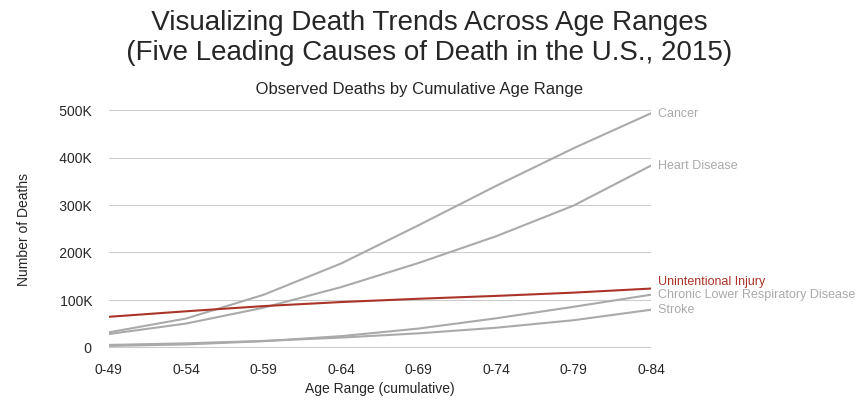

In [31]:
# Plot observed deaths for each cause of death across cumulative age ranges

fig, ax = plt.subplots(figsize=(7, 4))

plt.subplots_adjust(top=.75)
plt.suptitle('               Visualizing Death Trends Across Age Ranges\n               (Five Leading Causes of Death in the U.S., 2015)', fontsize=20)

plt.subplot(1, 1, 1)
plt.title('                 Observed Deaths by Cumulative Age Range')

plt.plot(obde_cancer['Age Range'], obde_cancer['Observed Deaths'], '-', color='#AAAAAA', zorder=2, label='Cancer')
plt.plot(obde_respiratory['Age Range'], obde_respiratory['Observed Deaths'], '-', color='#AAAAAA', zorder=2, label='Chronic Lower Respiratory Disease')
plt.plot(obde_heart['Age Range'], obde_heart['Observed Deaths'], '-', color='#AAAAAA', zorder=2, label='Heart Disease')
plt.plot(obde_stroke['Age Range'], obde_stroke['Observed Deaths'], '-', color='#AAAAAA', zorder=2, label='Stroke')
plt.plot(obde_injury['Age Range'], obde_injury['Observed Deaths'],'-', color='#AB3428', zorder=4, label='Unintentional Injury\n')

for line in ax.lines:
    last_x = line.get_xdata()[-1]
    last_y = line.get_ydata()[-1]
    label = line.get_label()
    color = line.get_color()
    ax.text(last_x, last_y, f'  {label}', ha='left', va='center', fontsize=9, color=color)

plt.xlabel('Age Range (cumulative)')
plt.xlim(0,7)
plt.ylabel('Number of Deaths')
plt.yticks([0,100000,200000,300000,400000,500000],['      0   ','      100K   ','      200K   ','      300K   ','      400K   ','      500K   '])
plt.grid(axis='x', visible=False)

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

## A Hidden Trend Across Age Ranges: Unintentional Injury in the U.S., 2015

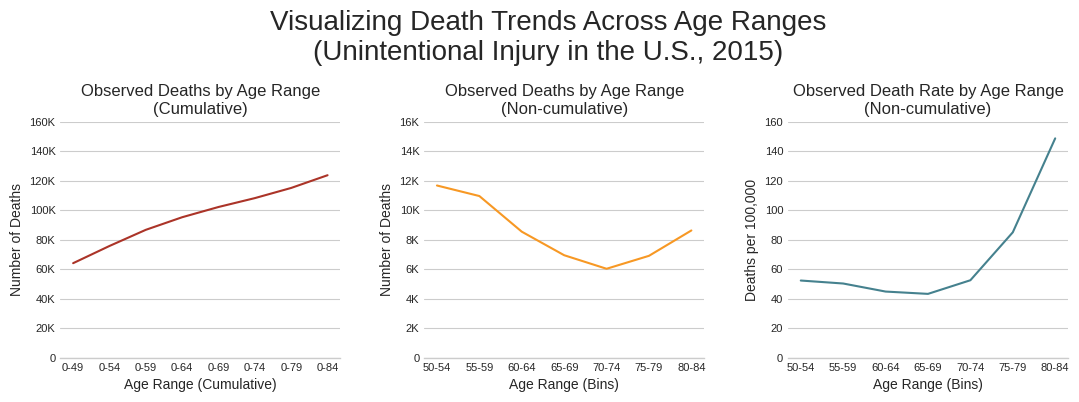

In [32]:
# Compare observed unintentional injury death risk via 3 visualizations
#  1. Cumulative observed deaths by age range
#  2. Non-cumulative observed deaths by age range
#  3. Non-cumulative death rate by age range

plt.figure(figsize=(13, 4))
plt.subplots_adjust(wspace=0.3, top=.7)
plt.suptitle('Visualizing Death Trends Across Age Ranges\n(Unintentional Injury in the U.S., 2015)', fontsize=20)

plt.subplot(1, 3, 1)
plt.title('Observed Deaths by Age Range\n(Cumulative)')
plt.plot(obde_injury['Age Range'], obde_injury['Observed Deaths'],'-', color='#AB3428', zorder=2)
plt.xlabel('Age Range (Cumulative)')
plt.xticks(fontsize=8)
plt.ylabel('Number of Deaths')
plt.ylim(0,160000)
plt.yticks([0,20000,40000,60000,80000,100000,120000,140000,160000],['0','20K','40K','60K','80K','100K','120K','140K','160K'],fontsize=8)
plt.grid(axis='x', visible=False)

plt.subplot(1, 3, 2)
plt.title('Observed Deaths by Age Range\n(Non-cumulative)')
plt.plot(obde_injury['Age Bin'], obde_injury['DeltaObDe'], '-', color='#F79824', zorder=2)
plt.xlabel('Age Range (Bins)')
plt.xticks(fontsize=8)
plt.ylabel('Number of Deaths')
plt.ylim(0,16000)
plt.yticks([0,2000,4000,6000,8000,10000,12000,14000,16000],['0','2K','4K','6K','8K','10K','12K','14K','16K'],fontsize=8)
plt.grid(axis='x', visible=False)

plt.subplot(1, 3, 3)
plt.title('Observed Death Rate by Age Range\n(Non-cumulative)')
plt.plot(obde_injury['Age Bin'], obde_injury['DeltaDeathRate'], '-', color='#45818E', zorder=2)
plt.xlabel('Age Range (Bins)')
plt.xticks(fontsize=8)
plt.ylabel('Deaths per 100,000')
plt.ylim(0,160)
plt.yticks(fontsize=8)
plt.grid(axis='x', visible=False)

sns.despine(top=True, right=True, left=True, bottom=False)


plt.show()

# Bad Data Visualization

In [33]:
# Calculate totals for Percent Potentially Excess Deaths by Cause of Death

# It doesn't make sense to add ratio values together that aren't portions of the same total (aka that have different denominators)
# These are sums of the percent potentially excess deaths (a ratio) from all the cumulative age ranges in the data frame

BAD_viz_pped = age_focus.groupby('Cause of Death')['Percent Potentially Excess Deaths'].sum()

BAD_viz_pped.head(5)

,Percent Potentially Excess Deaths
Cause of Death,
Cancer,181.2
Chronic Lower Respiratory Disease,363.3
Heart Disease,315.9
Stroke,344.3
Unintentional Injury,325.4


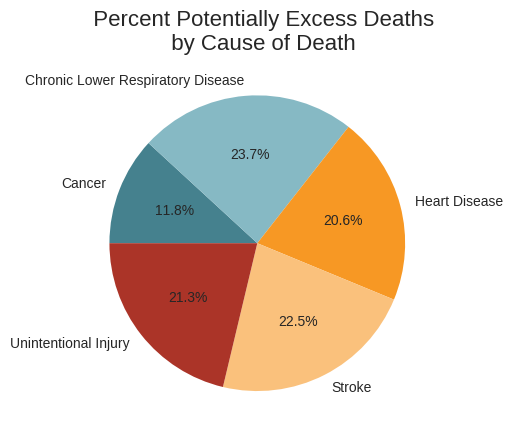

In [34]:
# Create a Bad Pie Chart

# The title and choice of pie graph could imply this is showing the portion of all excess deaths that are from each cause of death.
# As we know from our previous calculation, these are not portions of a total.

# Instead these meaningless "portions" come from sums of the percent potentially excess deaths
# from all the cumulative age ranges in the data frame (ratios with different denominators).

# Even if they were accurate percent potentially excess deaths values from each cause of death,
# they still would not share a denominator and so should not be used for a pie chart.

plt.pie(BAD_viz_pped.values,labels=BAD_viz_pped.index,
        autopct='%1.1f%%',
        startangle=180,
        counterclock=False,
        colors=['#45818E','#86B9C4','#F79824','#FAC17C','#AB3428'])
plt.title('  Percent Potentially Excess Deaths\n  by Cause of Death', fontsize=16)

plt.show()

# Curiosity

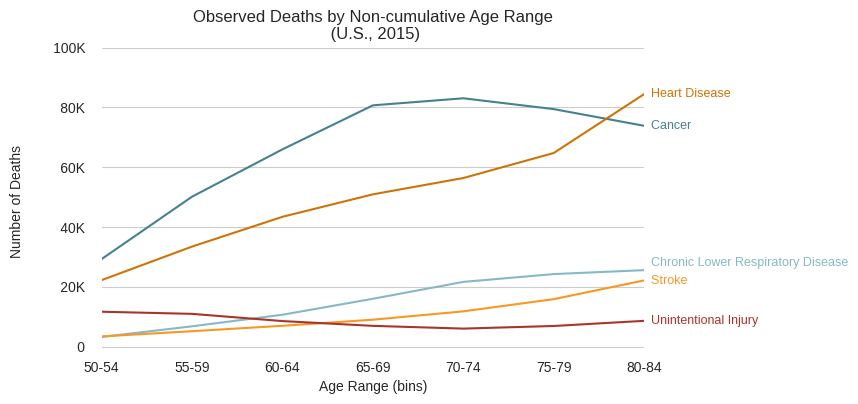

In [35]:
# Plot observed deaths for each cause of death across non-cumulative age ranges (age bins)

fig, ax = plt.subplots(figsize=(7, 4))

plt.title('Observed Deaths by Non-cumulative Age Range\n (U.S., 2015)')

plt.plot(obde_cancer['Age Bin'], obde_cancer['DeltaObDe'], '-', color='#45818E', zorder=2, label='Cancer') #AFD1D8 #34616A
plt.plot(obde_respiratory['Age Bin'], obde_respiratory['DeltaObDe'], '-', color='#86B9C4', zorder=2, label='Chronic Lower Respiratory Disease\n')
plt.plot(obde_heart['Age Bin'], obde_heart['DeltaObDe'], '-', color='#CD7407', zorder=2, label='Heart Disease') #FAC17C
plt.plot(obde_stroke['Age Bin'], obde_stroke['DeltaObDe'], '-', color='#F79824', zorder=2, label='Stroke')
plt.plot(obde_injury['Age Bin'], obde_injury['DeltaObDe'],'-', color='#AB3428', zorder=4, label='Unintentional Injury')

for line in ax.lines:
    last_x = line.get_xdata()[-1]
    last_y = line.get_ydata()[-1]
    label = line.get_label()
    color = line.get_color()
    ax.text(last_x, last_y, f'  {label}', ha='left', va='center', fontsize=9, color=color)

plt.xlabel('Age Range (bins)')
plt.xlim(1,7)
plt.ylabel('Number of Deaths')
plt.ylim(-3000,100000)
plt.yticks([0,20000,40000,60000,80000,100000],['      0   ','      20K   ','      40K   ','      60K   ','      80K   ','      100K   '])
plt.grid(axis='x', visible=False)

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()